## Assignment: Бэггинг и случайный лес

Загрузите датасет digits с помощью функции load_digits из sklearn.datasets и подготовьте матрицу признаков X и ответы на обучающей выборке y (вам потребуются поля data и target в объекте, который возвращает load_digits).

Для оценки качества далее нужно будет использовать cross_val_score из sklearn.cross_validation с параметром cv=10. Эта функция реализует k-fold cross validation c k равным значению параметра cv. Мы предлагаем использовать k=10, чтобы полученные оценки качества имели небольшой разброс, и было проще проверить полученные ответы. На практике же часто хватает и k=5. Функция cross_val_score будет возвращать numpy.ndarray, в котором будет k чисел - качество в каждом из k экспериментов k-fold cross validation. Для получения среднего значения (которое и будет оценкой качества работы) вызовите метод .mean() у массива, который возвращает cross_val_score.

С небольшой вероятностью вы можете натолкнуться на случай, когда полученное вами качество в каком-то из пунктов не попадет в диапазон, заданный для правильных ответов - в этом случае попробуйте перезапустить ячейку с cross_val_score несколько раз и выбрать наиболее «типичное» значение. Если это не помогает, то где-то была допущена ошибка.

Если вам захочется ускорить вычисление cross_val_score - можете попробовать использовать параметр n_jobs, но будьте осторожны: в одной из старых версий sklearn была ошибка, которая приводила к неверному результату работы cross_val_score при задании n_jobs отличным от 1. Сейчас такой проблемы возникнуть не должно, но проверить, что все в порядке, не будет лишним.

In [1]:
import sys
sys.version_info

sys.version_info(major=2, minor=7, micro=11, releaselevel='final', serial=0)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from sklearn import cross_validation, datasets, tree, ensemble, grid_search

import numpy as np
import pandas as pd

In [4]:
import os

def write_result(task_number, data) : 
    filename = "./results/result%s.txt" % task_number
    directory = os.path.dirname(filename)
    
    if not os.path.exists(directory):
        os.makedirs(directory)

    file = open(filename, 'w')
    for symbol in data:
        file.write(str(symbol) + ' ')
    file.close()

In [5]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [6]:
X.shape

(1797L, 64L)

1.Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [7]:
dt_classifier = tree.DecisionTreeClassifier()
dt_classifier.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
score = cross_validation.cross_val_score(dt_classifier, X, y, cv=10).mean()
print "decision tree, score =", score

decision tree, score = 0.828645193748


In [9]:
write_result(1, [score])

2.Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [10]:
bagging_classifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=100)
bagging_classifier.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [11]:
score = cross_validation.cross_val_score(bagging_classifier, X, y, cv=10).mean()
print "bagging classifier, score = ", score

bagging classifier, score =  0.928279380337


In [12]:
write_result(2, [score])

3.Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [13]:
d = X.shape[1]
q = sqrt(d)

In [14]:
bagging_classifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=100, max_features=int(q))
bagging_classifier.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=8,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [15]:
score = cross_validation.cross_val_score(bagging_classifier, X, y, cv=10).mean()
print "bagging with random features, score =", score

bagging with random features, score = 0.935984272759


In [16]:
write_result(3, [score])

4.Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [17]:
bagging_classifier = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(max_features=int(q)), n_estimators=100)
bagging_classifier.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=8, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [18]:
score = cross_validation.cross_val_score(bagging_classifier, X, y, cv=10).mean()
print "bagging with random features in every tree node, score =", score

bagging with random features in every tree node, score = 0.955594167575


In [19]:
write_result(4, [score])

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно.

In [20]:
rf_classifier = ensemble.RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
score = cross_validation.cross_val_score(rf_classifier, X, y, cv=10).mean()
print "Random forest, score =", score

Random forest, score = 0.952800874467


На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

1) Случайный лес сильно переобучается с ростом количества деревьев (False)

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев (True)

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется. (True)

In [22]:
n_estimators = [5, 10, 15, 20, 25, 30, 35, 40, 50, 100, 150, 200, 250, 300]
params_grid = {'n_estimators': n_estimators}
rf_classifier = ensemble.RandomForestClassifier()

grid_rf = grid_search.GridSearchCV(rf_classifier, params_grid, cv=10, scoring='accuracy')
grid_rf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

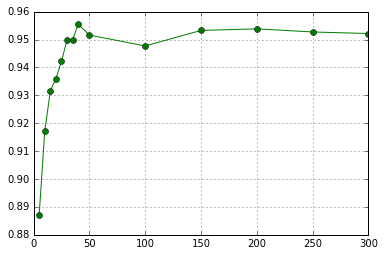

In [23]:
means = map(lambda grid_score: grid_score[1], grid_rf.grid_scores_)

pylab.grid(True)
pylab.plot(n_estimators, means, 'g-', marker='o')
pylab.show()

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция. (True)

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно. (False)

In [24]:
max_features = [5, 8, 10, 15, 21, 25, 30, 40, 50, 60, int(d)]
params_grid = {'max_features' : max_features}
rf_classifier = ensemble.RandomForestClassifier(n_estimators=100)

grid_rf = grid_search.GridSearchCV(rf_classifier, params_grid, cv=10, scoring='accuracy')
grid_rf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [5, 8, 10, 15, 21, 25, 30, 40, 50, 60, 64]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

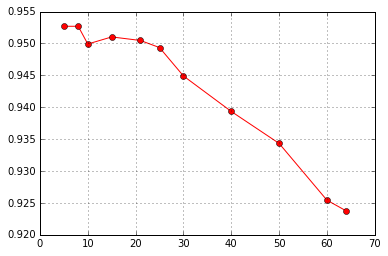

In [25]:
means = map(lambda grid_score: grid_score[1], grid_rf.grid_scores_)

pylab.grid(True)
pylab.plot(max_features, means, 'r-', marker='o')
pylab.show()

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается. (False)

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга). (True)

In [26]:
max_depth = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]
params_grid = {'max_depth' : max_depth}
rf_classifier = ensemble.RandomForestClassifier(n_estimators=100)

grid_rf = grid_search.GridSearchCV(rf_classifier, params_grid, cv=10, scoring='accuracy')
grid_rf.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

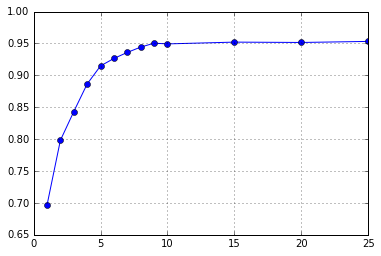

In [27]:
means = map(lambda grid_score: grid_score[1], grid_rf.grid_scores_)

pylab.grid(True)
pylab.plot(max_depth, means, 'b-', marker='o')
pylab.show()

In [28]:
write_result(5, [2, 3, 4, 7])